<a href="https://colab.research.google.com/github/beaamoo/Machine-Learning-Demonstration/blob/main/Hierarchical-clustering-Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering with Iris Dataset

##Theory

Hierarchical clustering is a type of unsupervised learning which groups similar data points or objects into groups called clusters.

**Popular examples of classification algorithms are:**

- Logistic Regression
- Support Vector Classifier
- Naive Bayes
- Decision Trees
- Random Forest
- Neural Networks

**Examples of clustering algorithms are:**

- Hierarchical clustering
- K-Means Clustering
- Mean Shift Clustering
- Spectral Clustering

### Types of Hierarchical Clustering

- Agglomerative hierarchical clustering
- Divisive hierarchical clustering

### Measure of Distance between Clusters

Measurements of distance or similarity between clusters can be computed using various metrics. The most commonly used distance metric is the Euclidean distance, which is based on the length of the straight line drawn from one cluster to another. This metric is most suitable for representing distance between two points in either the plane or 3-dimensional space.

Apart from Euclidean distance, several other metrics such as Hamming Distance, Manhattan Distance (Taxicab or City Block), and Minkowski Distance have been developed to measure distance. The choice of distance metric should be based on the field of study or the problem that needs to be solved.

For example, if one is measuring the distance between objects on a uniform grid, such as a chessboard or city blocks, then Manhattan distance would be a suitable choice.

### Linkage Methods

In order to combine two clusters, we need to calculate the distance between them using a selected distance metric. If there is a point that hasn't been assigned to any of the clusters, we also need to calculate the distance between each cluster and the point. The method used for computing these distances, known as linkage, determines how the distance between clusters or point-to-cluster distance is calculated.

Different linkage methods:

- single linkage: calculates the shortest distance between a pair of observations in two clusters.
- average linkage: calculates the distance between each observation in one cluster to every observation in the other cluster and uses the average distance to decide which clusters will merge. 
- median linkage
- complete linkage
- centroid linkage
- Ward's linkage: which is based on the increase in the error sum of squares after merging two clusters.

Average linkage and complete linkage are popular distance metrics, but when there are no clear theoretical justifications for the choice of linkage criteria, Ward’s method is often used as the default option.

### Choosing the number of clusters

To choose the number of clusters in hierarchical clustering the concept called dendrogram can be used.

### Cophenetic correlation

The cophenetic correlation coefficient is a statistical measure used to assess the accuracy of a dendrogram in preserving the pairwise distances between the original unmodeled data points. It is commonly used in the field of biostatistics, particularly to evaluate cluster-based models of DNA sequences or other taxonomic models. However, it can also be applied in other fields where data naturally cluster together. This coefficient has also been suggested as a means of testing for nested clusters.

### Divisive Hierarchical Clustering

Divisive hierarchical clustering is a method of hierarchical clustering that is less commonly used compared to agglomerative clustering in solving real-world problems. Unlike agglomerative clustering, divisive clustering starts with all the data points as a single cluster.

In each iteration, the algorithm separates the farthest points or clusters that are dissimilar until each data point is considered as an individual cluster. This process involves dividing the initial single cluster into n clusters, hence the name divisive clustering.

## Demonstartion of Hierarchical Clustering

###Import libraries and Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# Import iris data 
iris = datasets.load_iris()

iris_data = pd.DataFrame(iris.data)
iris_data.columns = iris.feature_names
iris_data['flower_type'] = iris.target
print(iris.target_names)
iris_data.head()

['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),flower_type
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Create Dendrogram

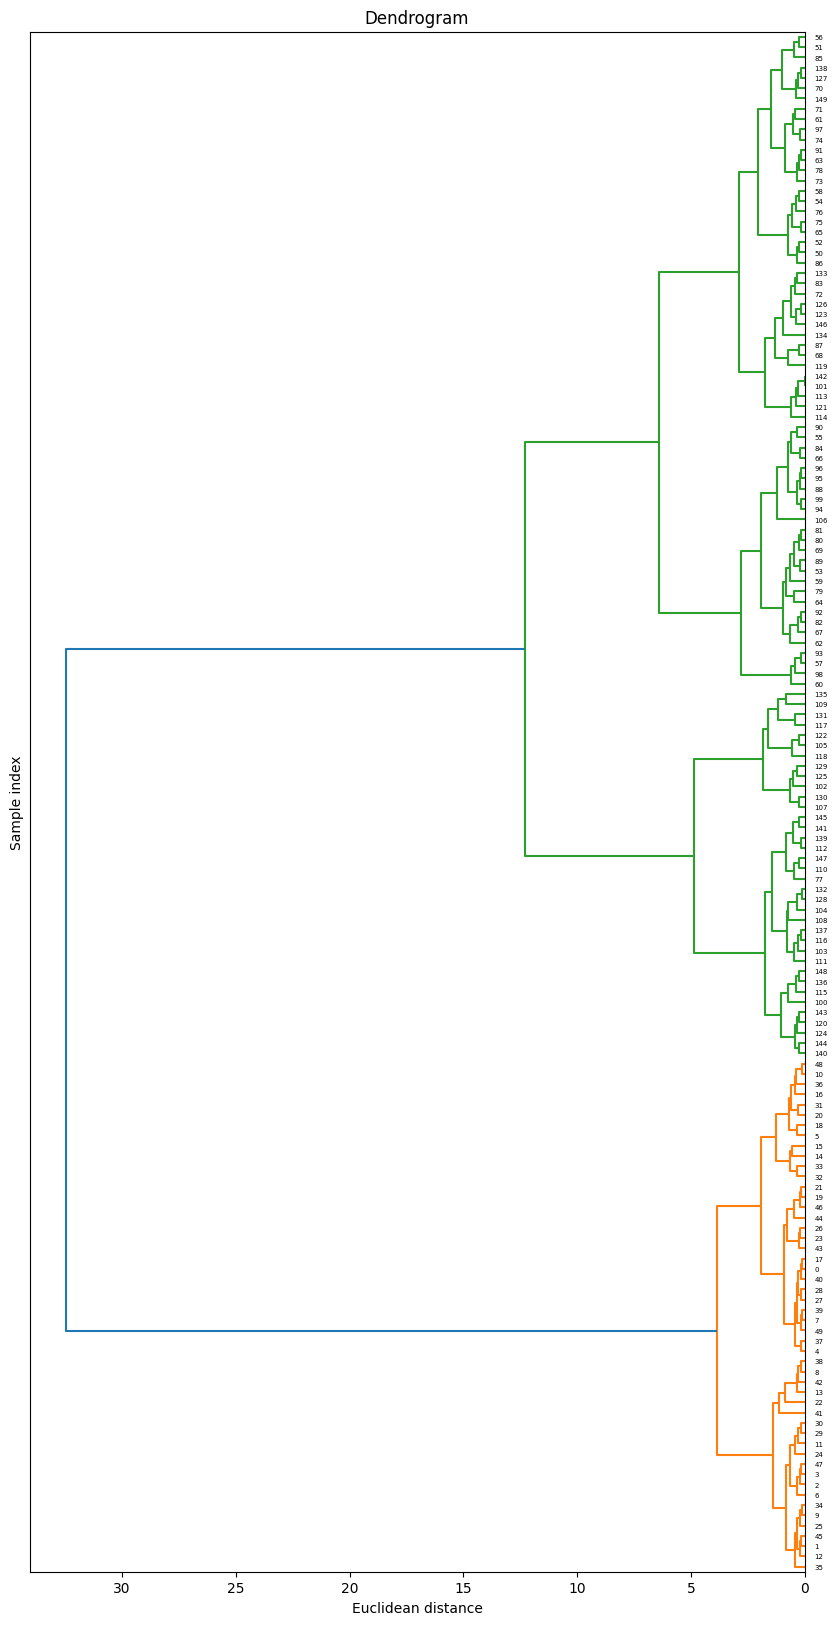

In [2]:
import scipy.cluster.hierarchy as sc

# Plot dendrogram
plt.figure(figsize=(10, 20))  
plt.title("Dendrograms")  

# Create dendrogram
sc.dendrogram(sc.linkage(iris.data, method='ward'),orientation='left')

plt.title('Dendrogram')
plt.xlabel('Euclidean distance')
plt.ylabel('Sample index')
plt.show()

### Fit the model


To perform clustering using the AgglomerativeClustering algorithm, we first specify the distance measure as Euclidean distance and the linkage method as Ward linkage. Then the model is fit on our data points and obtain an array of integers using the labels_ property. The values in the array correspond to distinct categories, which in our case are represented by 0s, 1s, and 2s since we defined 3 clusters. The value 0 indicates that a data point belongs to the first cluster, while 1 and 2 indicate membership in the second and third clusters, respectively.

In [3]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(
    n_clusters=3, affinity='euclidean', linkage='ward')

cluster.fit(iris.data)
labels = cluster.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [4]:
if labels[:5].sum() == 5: # probably 0 & 1 classes are switched...
    id0 = np.where(labels==0)
    id1 = np.where(labels==1)
    labels[id0]=1
    labels[id1]=0
    print('0 & 1 labels switched')

0 & 1 labels switched


In [5]:
print(labels)
print(iris.target)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Visualize the clusters

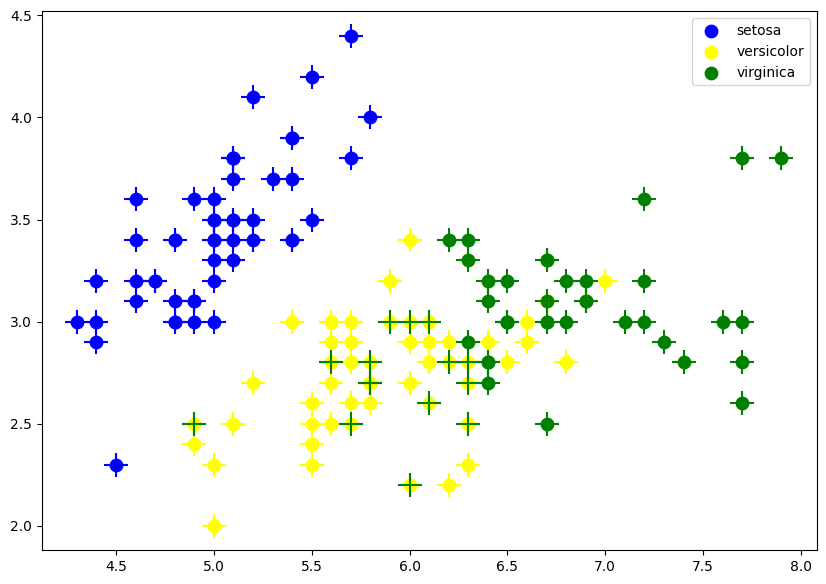

In [6]:
labels = cluster.labels_
plt.figure(figsize=(10, 7))
colors=['blue','yellow','green']
for i,label in enumerate(iris.target_names):
    plt.scatter(iris.data[labels == i, 0], iris.data[labels == i, 1], s = 80, c = colors[i], label = label)
plt.legend()

labels = iris.target
for i,label in enumerate(iris.target_names):
    plt.scatter(iris.data[labels == i, 0], iris.data[labels == i, 1], s=320, marker='+', c = colors[i], label = label)
plt.show()

The scatter plot above displays an overlap among the three types of Iris flowers. Our goal is to form clusters using hierarchical clustering and then compare them with the original classes. Despite some overlap between Type 2 and Type 3 clusters, the resulting clustering is quite similar to the actual data classification.

### Pros and Cons of Hierarchical Clustering

- Similar to K-means clustering, hierarchical clustering does not require the number of clusters to be specified beforehand.

- Hierarchical clustering is generally more suitable for smaller datasets, as it can become challenging to determine the optimal number of clusters from the dendrogram for larger datasets.

- In comparison to K-means clustering, hierarchical clustering is computationally intensive and takes longer to execute.

### Technical notes on dendrogram

#### Parameterized dendrogram

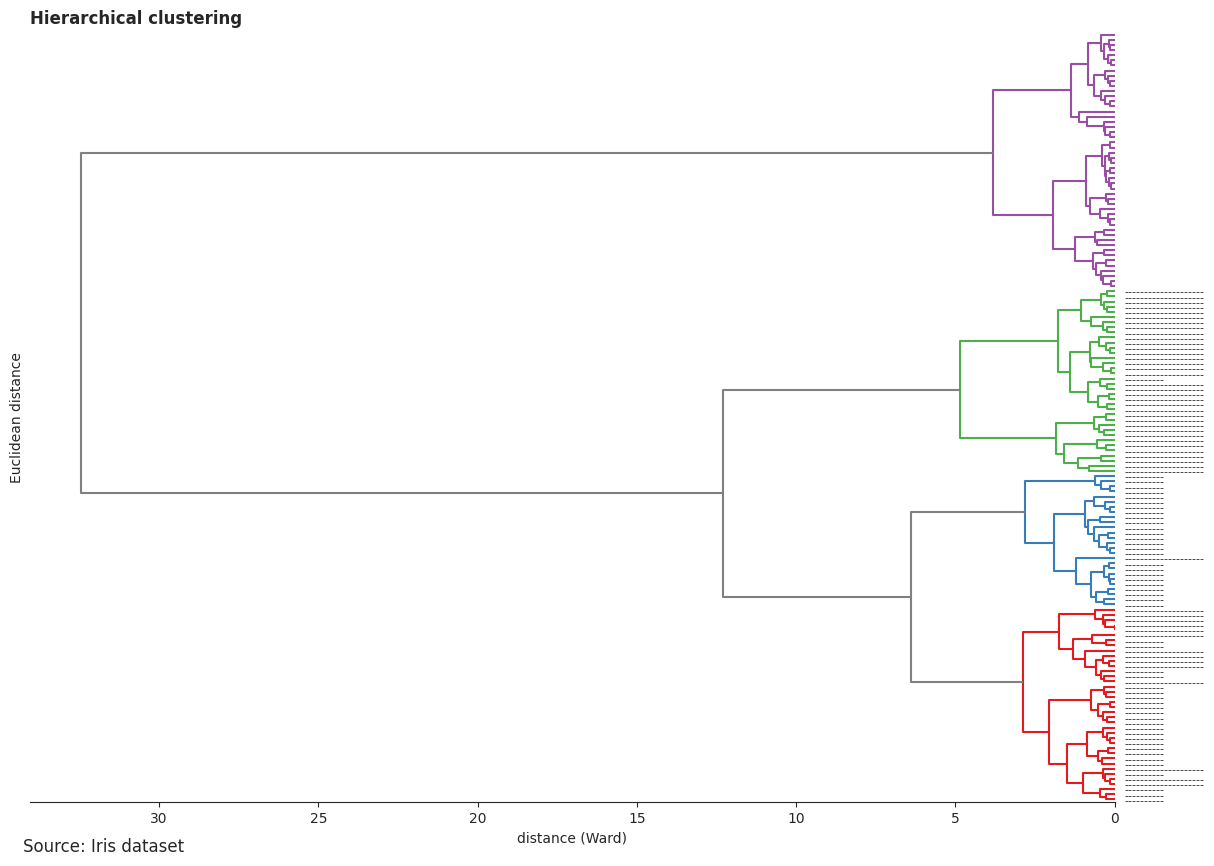

In [7]:
import scipy.cluster.hierarchy as sc # dendrogram, linkage, set_link_color_palette
# import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

iris_x = iris.data

plt.figure(figsize=(14, 10))  
fig = plt.gcf() # loads the current figure (get current figure) so that it can be assigned to the variable fig.
# fig.set_size_inches(14,10)
# fig.set_dpi(250)

# set some nicer default colors
sns.set_style('white')
sns.set_palette('Set1', 11, 0.65)
palette = sns.color_palette('Set1').as_hex()

# the values in the color palette object must be transformed into a regular list of color strings for set_link_color
palette = [i for i in palette]
sc.set_link_color_palette(palette)

title = """Hierarchical clustering"""
plt.title(title, loc = 'left', weight='bold')
plt.xlabel('distance (Ward)')
plt.ylabel('Euclidean distance')
# show x ticks
plt.tick_params(axis='x', top=False, reset=True)
# add source text
fig.text(0.12, 0.06, "Source: Iris dataset", size=12)
n=100
count=20
last = ''
# First define the leaf label function.
def llf(id):
    global last
    new = iris.target[id]
    if new != last:
        last = new;
        return '-'*iris.target[id]*10
    else:
        return '-'*iris.target[id]*10
            
Z = sc.linkage(iris_x, method='ward')
R = sc.dendrogram(Z, 
                  orientation="left", 
                  above_threshold_color='grey',
                  color_threshold=5,
                  distance_sort='descending',
                  show_leaf_counts=True,
                  leaf_label_func=llf,
                  leaf_rotation=0,
                  labels=iris.target,
                  leaf_font_size=8)
sns.despine(left=True)
# fig.savefig('dendrogram.png', dpi=250, bbox_inches='tight' )

# Note: If you would like to export out a vector image with editable text, 
# you will need to include matplotlib.rcParams['pdf.fonttype'] = 42 at the beginning of your notebook. 
# rcParams is a dictionary-like file with default settings for all of Matplotlib. 

#### Seaborn clustermap

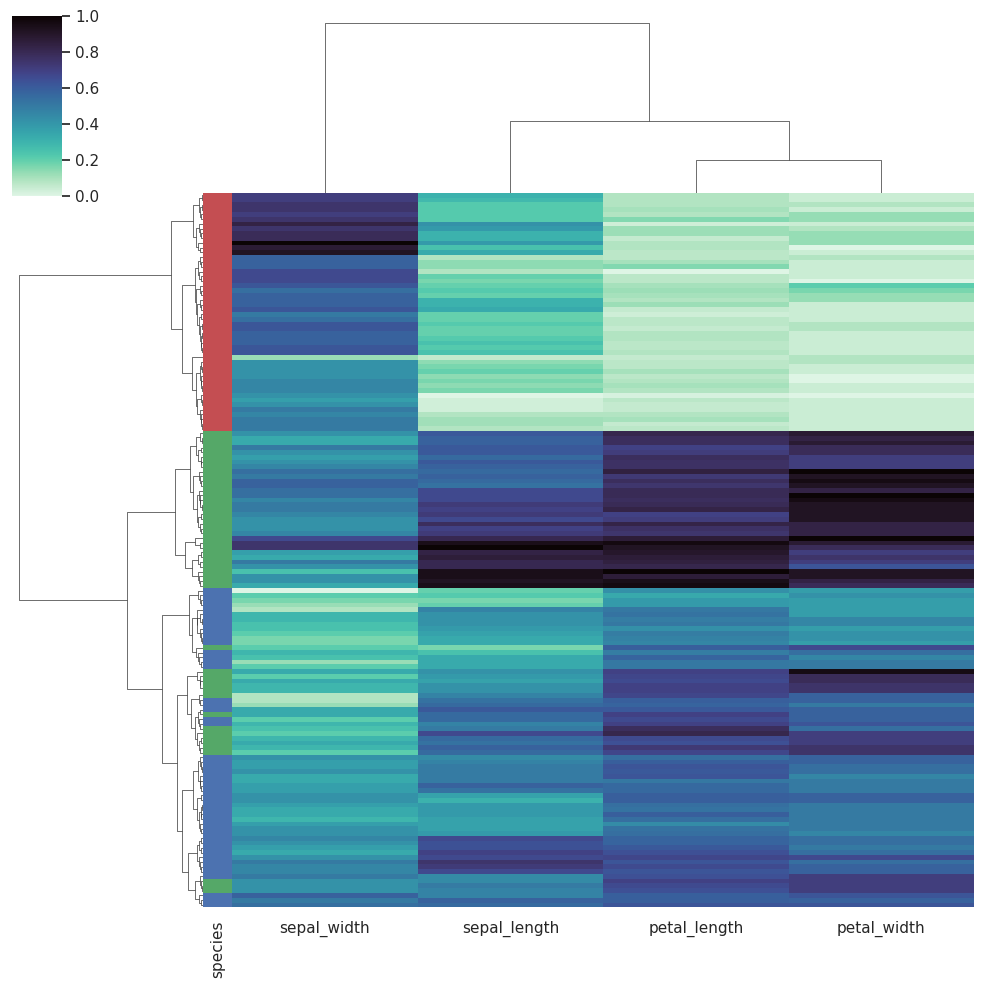

In [8]:
# Outputting Dendrogram With Heat Map Using Seaborn’s Clustermap Function
import seaborn as sns
irisx = sns.load_dataset("iris")
species = irisx.pop("species")

sns.set_theme(color_codes=True)
lut = dict(zip(species.unique(), "rbg"))
row_colors = species.map(lut)
g = sns.clustermap(irisx, 
                   method="ward",      # "average"
                   metric="euclidean", # "correlation",
                   standard_scale=1,
                   # z_score=1,
                   cmap='mako_r',
                   row_colors=row_colors, 
                   yticklabels=False) # figsize=(8, 12)

# plt.savefig('Seaborn_clustermap_python.png',dpi=150)

#### Customized annotated dendrograms

(11175,)


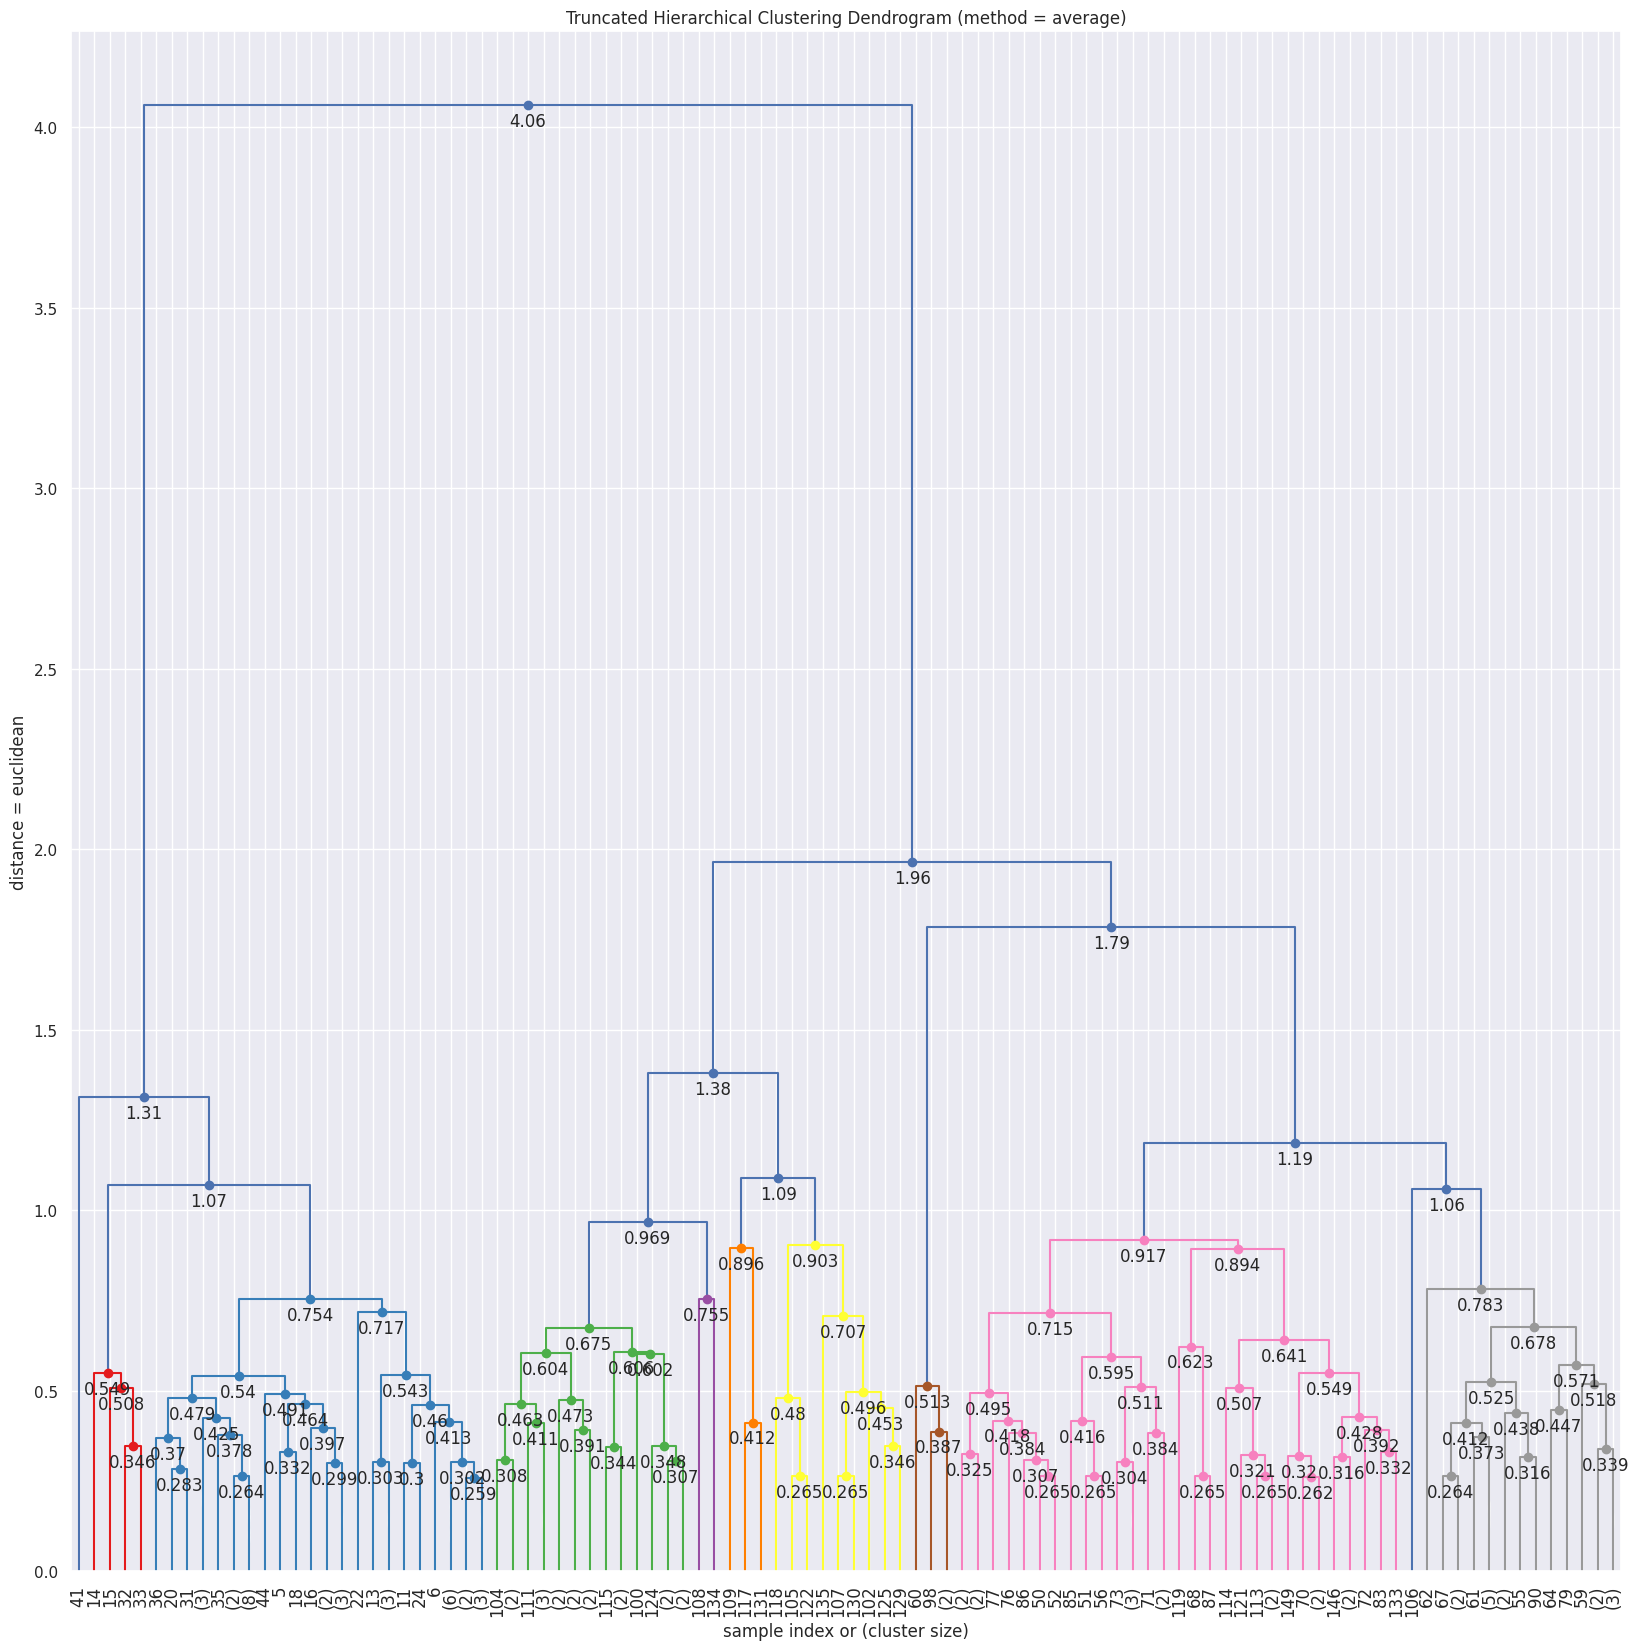

Choose your method for flat cluster retrieval
method: number k: 4 
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 4 4 4 4 4 4 3 4 4 3 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 4 4 3 4 2 4 2 2 2 2 4 2 2 2 2
 2 2 4 4 2 2 2 2 4 2 4 2 4 2 2 4 4 2 2 2 2 2 4 2 2 2 2 4 2 2 2 4 2 2 2 4 2
 2 4]
method: distance max_d: 1 
 [ 2  2  2  2  2  2  2  2  2  2  2  2  2  2  1  1  2  2  2  2  2  2  2  2
  2  2  2  2  2  2  2  2  1  1  2  2  2  2  2  2  2  3  2  2  2  2  2  2
  2  2  8  8  8  9  8  9  8  7  8  9  7  9  9  8  9  8  9  9  8  9  8  8
  8  8  8  8  8  8  8  9  9  9  9  8  9  8  8  8  9  9  9  8  9  7  9  9
  9  8  7  9  4  8  6  4  4  6 10  6  4  5  4  4  4  8  8  4  4  5  6  8
  4  8  6  8  4  6  8  8  4  6  6  5  4  8  4  6  4  4  8  4  4  4  8  4
  4  4  8  4  4  8]


In [9]:
from scipy.spatial.distance import pdist
X=iris.data
metric = 'euclidean' # 'cosine'

dm = pdist(X, metric) # X is the array containing doc vectors
print(dm.shape)
# dm = Pairwise distances between observations in n-dimensional space

method = 'average'
Z = sc.linkage(X, method=method, metric=metric, optimal_ordering=False)

def annotated_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs: kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = sc.dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Truncated Hierarchical Clustering Dendrogram (method = %s)' % method)
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance = %s' % metric)
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

plt.figure(figsize=(20,20))
annotated_dendrogram(
    Z,
    color_threshold=0.94,
    truncate_mode='lastp',
    p=100,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=0,  # useful in small plots so annotations don't overlap
    max_d=None
)

plt.show()

print("Choose your method for flat cluster retrieval")
# method = input("Number or distance? ")
method = "number"
k = 4 # input("Enter the number of clusters to retrieve: ")
cluster = sc.fcluster(Z, k, criterion='maxclust')
print('method:',method,'k:',k,'\n',cluster)

method = "distance"
max_d = 1 # input("Enter the distance cutoff: ")
cluster = sc.fcluster(Z, max_d, criterion='distance')
print('method:',method,'max_d:',max_d,'\n',cluster)

In [10]:
print(cluster.shape)

(150,)
